In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


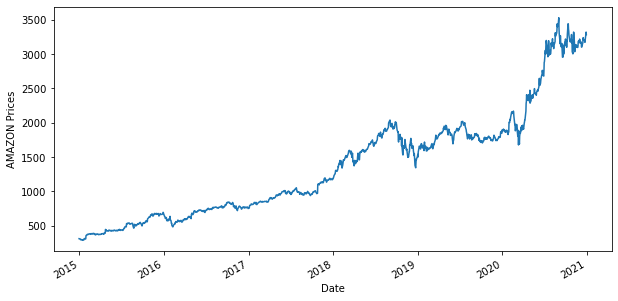

In [2]:
Df = yf.download('AMZN','2015-01-01','2020-12-31')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("AMAZON Prices")
plt.show()

In [3]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2015-01-14,294.359996,299.812222
2015-01-15,293.139994,297.914442
2015-01-16,291.653330,295.517778
2015-01-20,290.319997,294.245555
2015-01-21,289.043335,293.595554


In [4]:
y = Df['Close']
y.head()

Date
2015-01-14    293.269989
2015-01-15    286.950012
2015-01-16    290.739990
2015-01-20    289.440002
2015-01-21    297.250000
Name: Close, dtype: float64

In [5]:
t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [6]:
linear = LinearRegression().fit(X_train,y_train)

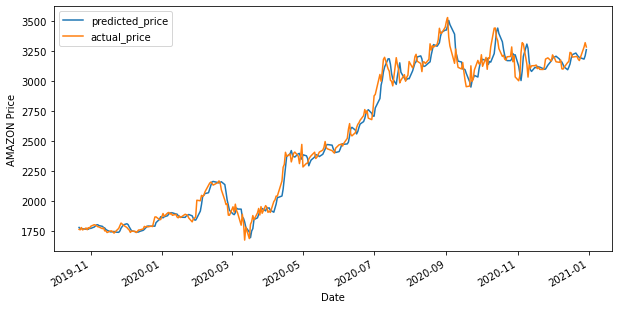

In [9]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AMAZON Price")  
plt.show()

In [8]:
r2_score = linear.score(X[t:],y[t:])*100 
float("{0:.2f}".format(r2_score))

98.64